<a href="https://colab.research.google.com/github/suryam3107/Mini-Project/blob/main/Mini_Project_Image_Classification_using_Machine_Learning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MINOR PROJECT**

---


**IMAGE CLASSIFICATION USING MACHINE LEARNING**



In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 2.18 ms (started: 2021-05-20 14:13:59 +00:00)


**STEP 1: GATHER DATA**

MANUALLY DOWNLOADED IMAGES TO GATHER DATA AS BING IMAGE DOWNLOADER DID NOT GIVE GREAT RESULTS 

CATEGORIES : [CARS = 30 IMAGES, SPORT BALLS = 30 IMAGES, ROSES = 30 IMAGES]

**STEP 2 : PREPROCESSING DATA**

In [2]:
#Preprocessing
#1. Resize
#2. Flattening

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images =[]
flat_data = []

DATADIR ='/content/drive/MyDrive/dataset for image classification using machine learning'
CATEGORIES = ['CARS','SPORT BALLS','ROSES']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)# Label Encoding the values
  path = os.path.join(DATADIR,category)# Create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3)) # Normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 30 s (started: 2021-05-20 14:13:59 +00:00)


In [3]:
len(flat_data[0])

67500

time: 5.18 ms (started: 2021-05-20 14:14:29 +00:00)


In [4]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 5.71 ms (started: 2021-05-20 14:14:29 +00:00)


<BarContainer object of 3 artists>

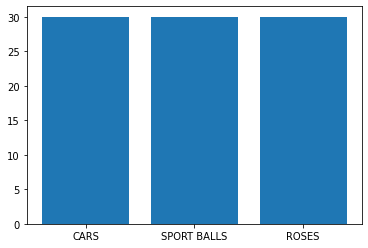

time: 145 ms (started: 2021-05-20 14:14:29 +00:00)


In [5]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [6]:
#Split data into Training and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                    test_size=0.3,random_state=109)

time: 181 ms (started: 2021-05-20 14:14:30 +00:00)


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid= [
             {'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 45s (started: 2021-05-20 14:14:30 +00:00)


In [8]:
y_pred =clf.predict(x_test)
y_pred

array([1, 2, 1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 153 ms (started: 2021-05-20 14:16:16 +00:00)


In [9]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 3.61 ms (started: 2021-05-20 14:16:16 +00:00)


In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 934 µs (started: 2021-05-20 14:16:16 +00:00)


In [11]:
accuracy_score(y_pred,y_test)

0.9259259259259259

time: 5.06 ms (started: 2021-05-20 14:16:16 +00:00)


In [12]:
confusion_matrix(y_pred,y_test)

array([[ 7,  1,  0],
       [ 0, 10,  0],
       [ 1,  0,  8]])

time: 5.4 ms (started: 2021-05-20 14:16:16 +00:00)


In [13]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 45.3 ms (started: 2021-05-20 14:16:16 +00:00)


In [14]:
model = pickle.load(open('img_model.p','rb'))

time: 31.6 ms (started: 2021-05-20 14:16:16 +00:00)


Enter your URLhttps://tse1.mm.bing.net/th?id=OIP.qpbIlDKjPErEx-JpfQRTGwHaEK&pid=Api&P=0&w=273&h=155
(154, 273, 3)
PREDICTED OUTPUT: ROSES


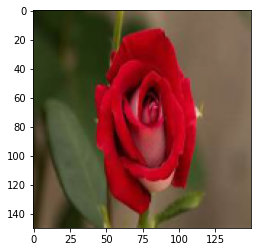

time: 24 s (started: 2021-05-20 14:16:16 +00:00)


In [15]:
#Testing a brand new Image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

In [16]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 3.9MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
     |████████████████████████████████| 4.2MB 53.9MB/s 
     |████████████████████████████████| 174kB 44.6MB/s 
     |████████████████████████████████| 112kB 51.3MB/s 
     |████████████████████████████████| 92kB 11.0MB/s 
     |████████████████████████████████| 122kB 45.3MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=1cb195da02cb3ed05578f9bf8959e5e97b1d2f4ef1a6a9380ffaf2216dc5b0cc
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1
  Found existing installatio

     |████████████████████████████████| 747kB 3.9MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=6164be30478d777ccf3098f91767e9e9a313e7b23bbbb7e959f746ff3ada8514
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok
time: 17.3 s (started: 2021-05-20 14:16:40 +00:00)


In [17]:
# Deployment :
# 1. WebPage - HTML/CSS/JS - Flask/Django
# 2. WebApp - Streamlit/Dash
# 3. Mobile App - Kotlin/Java

time: 1.23 ms (started: 2021-05-20 14:16:57 +00:00)


In [18]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('Image Classifier using Machine Learning')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image...",type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['CARS','SPORT BALLS','ROSES']
    st.write('Result...')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3)) 
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f'PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')      

Writing app.py
time: 3.06 ms (started: 2021-05-20 14:16:57 +00:00)


In [19]:
!nohup streamlit run --server.port 80 app.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://1c82da0a5201.ngrok.io" -> "http://localhost:80">

time: 1.36 s (started: 2021-05-20 14:16:57 +00:00)
